In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv("final_data7.csv")
print(df.shape)
df.head()

(1819, 25)


,url,label,url_length,special_character_count,having_ip_address,dns_response_time,handshake_time,data_time,data_length,redirect,...,external_link_count,total_strings_count,average_string_length,max_len_strings,strings_above_avglength,whois_creation_date,whois_expiry_date,whois_last_updated,whois_country,whois_city
0,twitter.com/aQuariusrecOrds,good,27,2,0,1.866579,809.915781,185.235262,301912.0,False,...,73.0,26397.0,63.022881,46438.0,2436.0,2000-01-21T16:28:17Z,2020-01-21T16:28:17Z,2018-12-07T19:32:35Z,US,CA
1,tong464.org/,good,12,2,0,654.555559,3379.443407,799.807549,162844.0,True,...,18.0,9289.0,11.865217,5491.0,2936.0,2006-04-11T19:49:29Z,2025-04-11T19:49:29Z,2016-04-07T14:34:10Z,country_not_available,state_not_available
2,legacy.com/obituaries/orlandosentinel/obituary...,good,92,12,0,57.567120,2735.617161,29.102325,129957.0,True,...,58.0,22093.0,44.528946,28934.0,4508.0,1994-02-01T05:00:00Z,2021-12-20T17:37:52Z,2019-04-01T20:15:54Z,US,FL
3,natcath.org/ncr_onli.htm,good,24,3,0,1.390219,1009.941101,0.138521,3453.0,False,...,1.0,8.0,8.000000,8.0,0.0,1998-06-18T04:00:00Z,2024-06-17T04:00:00Z,2019-04-19T06:57:43Z,country_not_available,state_not_available
4,wn.com/San_Diego_State_Aztecs,good,29,2,0,1.077890,6096.054077,350.750208,204520.0,False,...,41.0,8248.0,12.376940,5491.0,2477.0,1995-03-23T05:00:00Z,2029-03-24T04:00:00Z,2019-04-12T19:51:39Z,REDACTED FOR PRIVACY,REDACTED FOR PRIVACY


In [173]:
# Quick statistical summary of data
df.describe(include='all')

,url,label,url_length,special_character_count,having_ip_address,dns_response_time,handshake_time,data_time,data_length,redirect,...,external_link_count,total_strings_count,average_string_length,max_len_strings,strings_above_avglength,whois_creation_date,whois_expiry_date,whois_last_updated,whois_country,whois_city
count,1819,1819,1819.000000,1819.000000,1819.000000,1819.000000,1791.000000,1791.000000,1.791000e+03,1791,...,1792.000000,1811.000000,1811.000000,1.811000e+03,1811.000000,1819,1819,1819,1817,1806
unique,1819,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,901,885,911,43,92
top,spiblog.pbs.org/2011/09/spi-files-karen-mell-k...,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,cdate_not_available,rdate_not_available,udate_not_available,country_not_available,state_not_available
freq,1,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1168,...,NaN,NaN,NaN,NaN,NaN,544,564,555,1034,1027
mean,NaN,NaN,47.843321,6.155580,0.009346,128.337215,1560.233217,310.214560,8.489945e+04,NaN,...,31.673549,11181.467145,22.892563,1.735832e+04,2830.214798,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,31.768850,4.106997,0.096247,216.588207,4235.769567,635.436642,2.003764e+05,NaN,...,62.636892,27324.442122,23.622174,4.809249e+04,9010.493238,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,9.000000,2.000000,0.000000,0.024557,0.000000,0.000000,0.000000e+00,NaN,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,30.000000,4.000000,0.000000,1.267433,0.000000,0.000000,0.000000e+00,NaN,...,1.000000,18.000000,7.678465,5.600000e+01,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,43.000000,5.000000,0.000000,23.092508,758.058310,2.724886,1.015800e+04,NaN,...,17.000000,3791.000000,16.809524,5.491000e+03,824.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,59.000000,8.000000,0.000000,228.833914,2049.501777,441.988230,9.391350e+04,NaN,...,41.000000,11957.000000,31.470965,2.795600e+04,2549.500000,NaN,NaN,NaN,NaN,NaN


In [174]:
print(df.isnull().sum())

url                          0
label                        0
url_length                   0
special_character_count      0
having_ip_address            0
dns_response_time            0
handshake_time              28
data_time                   28
data_length                 28
redirect                    28
protocol                    28
http_status_code            28
server_name                901
scripts_count               27
iframe_count                27
external_link_count         27
total_strings_count          8
average_string_length        8
max_len_strings              8
strings_above_avglength      8
whois_creation_date          0
whois_expiry_date            0
whois_last_updated           0
whois_country                2
whois_city                  13
dtype: int64


In [175]:
df = df.dropna(axis=0, subset=['strings_above_avglength' , 'scripts_count' , 'data_time','whois_city'])
df= pd.DataFrame(df)
print(df.isnull().sum())
print("shape:", df.shape)

url                          0
label                        0
url_length                   0
special_character_count      0
having_ip_address            0
dns_response_time            0
handshake_time               0
data_time                    0
data_length                  0
redirect                     0
protocol                     0
http_status_code             0
server_name                848
scripts_count                0
iframe_count                 0
external_link_count          0
total_strings_count          0
average_string_length        0
max_len_strings              0
strings_above_avglength      0
whois_creation_date          0
whois_expiry_date            0
whois_last_updated           0
whois_country                0
whois_city                   0
dtype: int64
shape: (1757, 25)


In [176]:
data = data.interpolate()

In [177]:
data = df.iloc[:,2:]
label = df["label"]

In [178]:
#numeric features
list_categorical_features = ["having_ip_address", "redirect", "protocol", "http_status_code",
                             "server_name","whois_creation_date","whois_expiry_date","whois_last_updated",\
                             "whois_country","whois_city"]
data_cat = data[list_categorical_features]
print(data_cat.shape)
data_cat.head()

(1757, 10)


,having_ip_address,redirect,protocol,http_status_code,server_name,whois_creation_date,whois_expiry_date,whois_last_updated,whois_country,whois_city
0,0,False,https,200.0,tsa_k,2000-01-21T16:28:17Z,2020-01-21T16:28:17Z,2018-12-07T19:32:35Z,US,CA
1,0,True,http,200.0,Apache,2006-04-11T19:49:29Z,2025-04-11T19:49:29Z,2016-04-07T14:34:10Z,country_not_available,state_not_available
2,0,True,https,200.0,cloudflare,1994-02-01T05:00:00Z,2021-12-20T17:37:52Z,2019-04-01T20:15:54Z,US,FL
3,0,False,http,200.0,nginx/1.14.1,1998-06-18T04:00:00Z,2024-06-17T04:00:00Z,2019-04-19T06:57:43Z,country_not_available,state_not_available
4,0,False,https,200.0,nginx,1995-03-23T05:00:00Z,2029-03-24T04:00:00Z,2019-04-12T19:51:39Z,REDACTED FOR PRIVACY,REDACTED FOR PRIVACY


In [179]:
for i  in range(len(data_cat)):
    try:
        val1,val2,val3 = data_cat.iloc[i , [5,6,7]]
        data_cat.iloc[i, 5] = val1.split("-")[0]
        data_cat.iloc[i, 6] = val2.split("-")[0]
        data_cat.iloc[i, 7] = val3.split("-")[0]
    except:
        print(data_cat.loc[i , 5])

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [181]:
key_values = data_cat["server_name"].value_counts()
keys = key_values.keys()
for i in range(len(data_cat)):
    val  = data_cat.iloc[i , 4]
    if val not in keys :
        data_cat.iloc[i  ,4] = "server_name_nan"
    elif key_values[val] == 1 :
        data_cat.iloc[i,4] = "server_name_single"

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [182]:
data_cat["server_name"].value_counts().shape

(73,)

In [183]:
encoded_cat_data = pd.get_dummies(data_cat)
encoded_cat_data.shape

(1757, 279)

In [184]:
encoded_cat_data.head()

,having_ip_address,http_status_code,redirect_False,redirect_True,protocol_http,protocol_https,server_name_ATS,server_name_ATS/7.1.2,server_name_AmazonS3,server_name_Apache,...,whois_city_Victoria,whois_city_WA,whois_city_WI,whois_city_Wilayah Persekutuan,whois_city_ca,whois_city_ilocos norte r3,whois_city_jilin,whois_city_ma,whois_city_nj,whois_city_state_not_available
0,0,200.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,200.0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,200.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,200.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,200.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
#joining the encoded categorical data with numerical data
data_numeric = data.drop(list_categorical_features, axis = 1)
data_numeric.head()

,url_length,special_character_count,dns_response_time,handshake_time,data_time,data_length,scripts_count,iframe_count,external_link_count,total_strings_count,average_string_length,max_len_strings,strings_above_avglength
0,27,2,1.866579,809.915781,185.235262,301912.0,8.0,6.0,73.0,26397.0,63.022881,46438.0,2436.0
1,12,2,654.555559,3379.443407,799.807549,162844.0,33.0,0.0,18.0,9289.0,11.865217,5491.0,2936.0
2,92,12,57.567120,2735.617161,29.102325,129957.0,55.0,2.0,58.0,22093.0,44.528946,28934.0,4508.0
3,24,3,1.390219,1009.941101,0.138521,3453.0,1.0,0.0,1.0,8.0,8.000000,8.0,0.0
4,29,2,1.077890,6096.054077,350.750208,204520.0,85.0,4.0,41.0,8248.0,12.376940,5491.0,2477.0


In [186]:
data_final = pd.concat([data_numeric, encoded_cat_data], axis=1, sort = False)
print(data_final.shape)
data_final.head()


(1757, 292)


,url_length,special_character_count,dns_response_time,handshake_time,data_time,data_length,scripts_count,iframe_count,external_link_count,total_strings_count,...,whois_city_Victoria,whois_city_WA,whois_city_WI,whois_city_Wilayah Persekutuan,whois_city_ca,whois_city_ilocos norte r3,whois_city_jilin,whois_city_ma,whois_city_nj,whois_city_state_not_available
0,27,2,1.866579,809.915781,185.235262,301912.0,8.0,6.0,73.0,26397.0,...,0,0,0,0,0,0,0,0,0,0
1,12,2,654.555559,3379.443407,799.807549,162844.0,33.0,0.0,18.0,9289.0,...,0,0,0,0,0,0,0,0,0,1
2,92,12,57.567120,2735.617161,29.102325,129957.0,55.0,2.0,58.0,22093.0,...,0,0,0,0,0,0,0,0,0,0
3,24,3,1.390219,1009.941101,0.138521,3453.0,1.0,0.0,1.0,8.0,...,0,0,0,0,0,0,0,0,0,1
4,29,2,1.077890,6096.054077,350.750208,204520.0,85.0,4.0,41.0,8248.0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
data_final.describe(include='all')

,url_length,special_character_count,dns_response_time,handshake_time,data_time,data_length,scripts_count,iframe_count,external_link_count,total_strings_count,...,whois_city_Victoria,whois_city_WA,whois_city_WI,whois_city_Wilayah Persekutuan,whois_city_ca,whois_city_ilocos norte r3,whois_city_jilin,whois_city_ma,whois_city_nj,whois_city_state_not_available
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1.757000e+03,1757.000000,1757.000000,1757.000000,1757.000000,...,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000
mean,47.905521,6.149687,123.738056,1574.808989,314.575958,8.608122e+04,14.711440,0.372795,31.854297,11340.444508,...,0.000569,0.024474,0.000569,0.001138,0.001138,0.000569,0.000569,0.000569,0.001707,0.574274
std,31.972585,4.105363,193.332407,4270.575643,640.166030,2.020096e+05,22.005367,0.865308,63.097092,27603.311401,...,0.023857,0.154558,0.023857,0.033729,0.033729,0.023857,0.023857,0.023857,0.041298,0.494593
min,9.000000,2.000000,0.024557,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,1.266956,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,5.000000,22.622108,778.821230,3.920317,1.137700e+04,8.000000,0.000000,17.000000,3910.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,59.000000,8.000000,228.809118,2051.874638,446.742773,9.517400e+04,20.000000,0.000000,41.000000,12257.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,641.000000,68.000000,1375.710964,130470.530500,7074.467182,3.869084e+06,443.000000,6.000000,1018.000000,305185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder().fit_transform(label)
value, counts = np.unique(label, return_counts=True)
print(value, counts)

[0 1] [ 208 1549]


In [324]:
# Get a training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_final, label, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
prediction = dict()

(878, 292)
(879, 292)
(878,)
(879,)


In [325]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=100, criterion = 'gini', class_weight={0:7,1:1})
rf.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight={0: 7, 1: 1},
            criterion='gini', max_depth=100, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [326]:
def eval_model(Y_test, Pred):
    print(classification_report(Y_test, Pred))
    print(confusion_matrix(Y_test, Pred))
    print("accuracy_score : ", accuracy_score(Y_test, Pred))

In [327]:
pred = rf.predict(X_test)
eval_model(Y_test, pred)
prediction["Random Forest"] = pred

              precision    recall  f1-score   support

           0       0.67      0.30      0.41       104
           1       0.91      0.98      0.95       775

   micro avg       0.90      0.90      0.90       879
   macro avg       0.79      0.64      0.68       879
weighted avg       0.88      0.90      0.88       879

[[ 31  73]
 [ 15 760]]
accuracy_score :  0.8998862343572241


In [328]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
prediction["KNN"] = pred
eval_model(Y_test, pred)

              precision    recall  f1-score   support

           0       0.47      0.31      0.37       104
           1       0.91      0.95      0.93       775

   micro avg       0.88      0.88      0.88       879
   macro avg       0.69      0.63      0.65       879
weighted avg       0.86      0.88      0.87       879

[[ 32  72]
 [ 36 739]]
accuracy_score :  0.8771331058020477


In [329]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
def AuROC(prediction, y_test=None):

    
    vfunc = np.vectorize(formatt)

    cmp = 0
    colors = ['b', 'g', 'y', 'm', 'k']
    for model, predicted in prediction.items():
        if model == "Logistic" or model == "SVM" or model == "SVM_Linear":
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
        else:
            false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

    plt.title('Classifiers comparaison with ROC')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [330]:
features = list(data_final)
feature_importances= dict()
imps = []
from sklearn.feature_selection import SelectFromModel
for feature in zip(features, rf.feature_importances_):
    feature_importances[feature[0]] = feature[1]
for key in feature_importances.keys():
#     print(key)
    imps.append(feature_importances[key])
imps = np.array(imps)
indexes = np.argsort(imps, axis=-1, kind='quicksort', order=None)
sorted_imps = sorted(imps)
#pick the top 10 features
VALUES = sorted_imps[-30:]
feature_indexes = indexes[-30:]
imp_features=[]
for i in feature_indexes:
    imp_features.append(features[i])

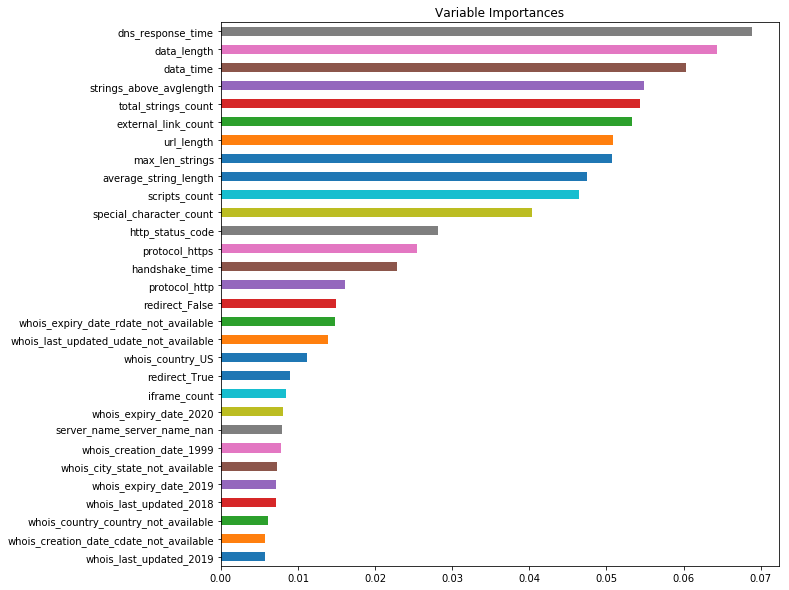

In [331]:
pd.Series(index = imp_features, data = VALUES).plot(kind='barh', title='Variable Importances', figsize = (10,10))


In [332]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(data_final)
scaled.shape

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(1757, 292)

In [333]:
x_train, x_test, y_train, y_test = train_test_split(scaled, label, test_size = 0.5)

### Logistic Regression

In [334]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear", class_weight="balanced").fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.34      0.82      0.49        99
           1       0.97      0.80      0.88       780

   micro avg       0.80      0.80      0.80       879
   macro avg       0.66      0.81      0.68       879
weighted avg       0.90      0.80      0.83       879

[[ 81  18]
 [154 626]]
accuracy_score :  0.8043230944254836


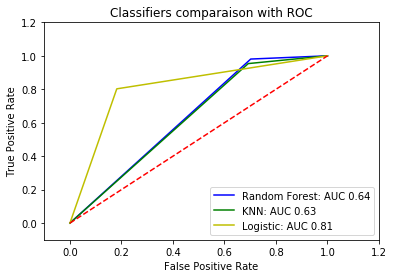

In [335]:
pred = clf.predict(x_test)
prediction["Logistic"] = pred
eval_model(y_test, pred)
AuROC(prediction, y_test)

### SVM

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.31      0.60      0.41        99
           1       0.94      0.83      0.88       780

   micro avg       0.81      0.81      0.81       879
   macro avg       0.63      0.71      0.65       879
weighted avg       0.87      0.81      0.83       879

[[ 59  40]
 [130 650]]
accuracy_score :  0.8065984072810012


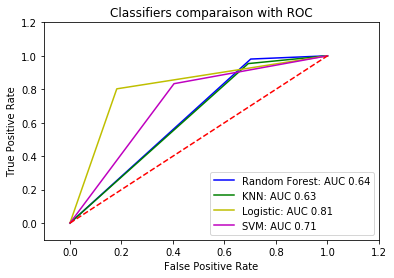

In [336]:

from sklearn.svm import SVC
clf = SVC(class_weight = {0:7, 1:1}, kernel = "rbf")
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
eval_model(y_test, pred)
prediction["SVM"] = pred
AuROC(prediction, y_test)

              precision    recall  f1-score   support

           0       0.35      0.74      0.47       112
           1       0.95      0.80      0.87       767

   micro avg       0.79      0.79      0.79       879
   macro avg       0.65      0.77      0.67       879
weighted avg       0.88      0.79      0.82       879

[[ 83  29]
 [157 610]]
accuracy_score :  0.78839590443686


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


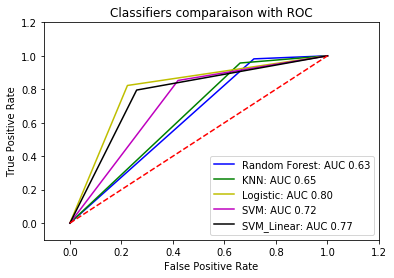

In [322]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(class_weight = {0:7, 1:1})
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
eval_model(y_test, pred)
prediction["SVM_Linear"] = pred
AuROC(prediction, y_test)